## Connected Cells / Flood Fill Practice

Create an image with `black and white` cell and fill some connected cell / use Tkinter and PIL

In [ ]:
%pip install pillow

## Cells Image

Add `black and white` cells to the image.

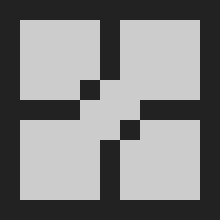

In [2]:
from PIL import Image, ImageTk

# Define intialization constants
BLACK = '#222222'
WHITE = '#CCCCCC'
CELL_SIZE = 20

# Create a new blank image
image = Image.new("RGB", (220, 220), "white")

def draw_convas():
    
    # Calculate the number of cells in each dimension
    n_x = 220 // CELL_SIZE
    n_y = 220 // CELL_SIZE

    # Iterate over the cells and set their colors
    for y in range(n_y):
        for x in range(n_x):

            # Calculate cell boundaries
            left = x * CELL_SIZE
            top = y * CELL_SIZE
            right = left + CELL_SIZE
            bottom = top + CELL_SIZE

            # Set the convas color
            color = WHITE

            # Set borders
            if x == 0 or y == 0:            color = BLACK
            if x == n_x -1 or y == n_y - 1: color = BLACK

            # Set middle model cells
            if x == 5 or y == 5:            color = BLACK
            if x == 5 and y > 3 and y < 7:  color = WHITE
            if y == 5 and x > 3 and x < 7:  color = WHITE
            if (x, y) == (4,4):             color = BLACK
            if (x, y) == (6,6):             color = BLACK

            # Fill the cell with color
            image.paste(color, (left, top, right, bottom))

draw_convas()

# Display the image inline
display(image)

## Flood Fill

Start from the center and color all the `connected region`.

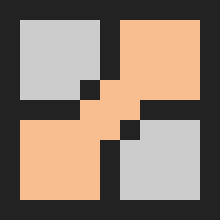

In [3]:
from PIL import Image, ImageTk

# Create a new blank image
image = Image.new("RGB", (220, 220), "white")

# Draw black and white cells
draw_convas()

# --------------------------------------------------------

FILL_COLOR = '#F8BE90'
WHITE_RGB = (204, 204, 204)

def get_boundaries(start):
    j, i = start

    x = i * CELL_SIZE
    y = j * CELL_SIZE
    width = x + CELL_SIZE
    height = y + CELL_SIZE

    return (x, y, width, height)

def flood_fill(start):
    j, i = start

    # Get cell boundaries
    boundaries = get_boundaries(start)

    # Fill the cell with color
    image.paste(FILL_COLOR, boundaries)

    # Neighbors coordinates
    W = j, i-1
    N = j-1, i
    E = j, i+1
    S = j+1, i

    # Check WEST
    boundaries = get_boundaries(W)
    c = image.crop(boundaries).getpixel((0, 0)) # get color
    if c == WHITE_RGB:
        flood_fill(W) # Recursive

    # Check NORTH
    boundaries = get_boundaries(N)
    c = image.crop(boundaries).getpixel((0, 0))
    if c == WHITE_RGB:
        flood_fill(N)

    # Check EAST
    boundaries = get_boundaries(E)
    c = image.crop(boundaries).getpixel((0, 0))
    if c == WHITE_RGB:
        flood_fill(E)

    # Check EAST
    boundaries = get_boundaries(S)
    c = image.crop(boundaries).getpixel((0, 0))
    if c == WHITE_RGB:
        flood_fill(S)

    
flood_fill((5, 5))

# --------------------------------------------------------

# Display the image inline
display(image)

## Animation / Time Delay

After each cell is filled, the displayed `image is updated`, creating an animation.

In [5]:
import tkinter as tk
from PIL import Image, ImageTk
import time

# Create a Tkinter window
window = tk.Tk()
window.title("Image Fill")

# Define dimensions
image_width = 220
image_height = 220
cell_size = 20

# Create a new blank image
image = Image.new("RGB", (image_width, image_height), "white")

# Create a Tkinter compatible photo image
photo = ImageTk.PhotoImage(image)

# Create a label widget to display the image
image_label = tk.Label(window, image=photo)
image_label.pack()

# Draw black and white cells
draw_convas()

def flood_fill(start):
    j, i = start

    # Get cell boundaries
    boundaries = get_boundaries(start)

    # Fill the cell with color
    image.paste(FILL_COLOR, boundaries)

    # ------------------------------------------------

    # Update the displayed image after each fill operation
    photo = ImageTk.PhotoImage(image)
    image_label.configure(image=photo)
    image_label.image = photo
    window.update()

    time.sleep(0.1)
    
    # ------------------------------------------------

    # Neighbors coordinates
    W = j, i-1
    N = j-1, i
    E = j, i+1
    S = j+1, i

    # Check WEST
    boundaries = get_boundaries(W)
    c = image.crop(boundaries).getpixel((0, 0)) # get color
    if c == WHITE_RGB:
        flood_fill(W) # Recursive

    # Check NORTH
    boundaries = get_boundaries(N)
    c = image.crop(boundaries).getpixel((0, 0))
    if c == WHITE_RGB:
        flood_fill(N)

    # Check EAST
    boundaries = get_boundaries(E)
    c = image.crop(boundaries).getpixel((0, 0))
    if c == WHITE_RGB:
        flood_fill(E)

    # Check EAST
    boundaries = get_boundaries(S)
    c = image.crop(boundaries).getpixel((0, 0))
    if c == WHITE_RGB:
        flood_fill(S)

    
flood_fill((5, 5))

# Start the Tkinter event loop
window.mainloop()

## References

[Flood Fill](https://en.wikipedia.org/wiki/Flood_fill) wikipedia